In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import scipy as cp

In [4]:
D=pd.read_excel("https://data.hossam.kr/E03/point.xlsx")

In [5]:
data=pd.DataFrame(D)

In [11]:
plt.rcParams["font.size"]=10
plt.rcParams["figure.figsize"]=(10,6)
plt.rcParams["font.family"]='BM YEONSUNG'
plt.rcParams["axes.unicode_minus"]=False

In [8]:
data

,언어영역,수리영역
0,392,428
1,404,518
2,346,376
3,382,426
4,368,409
5,449,490
6,391,448


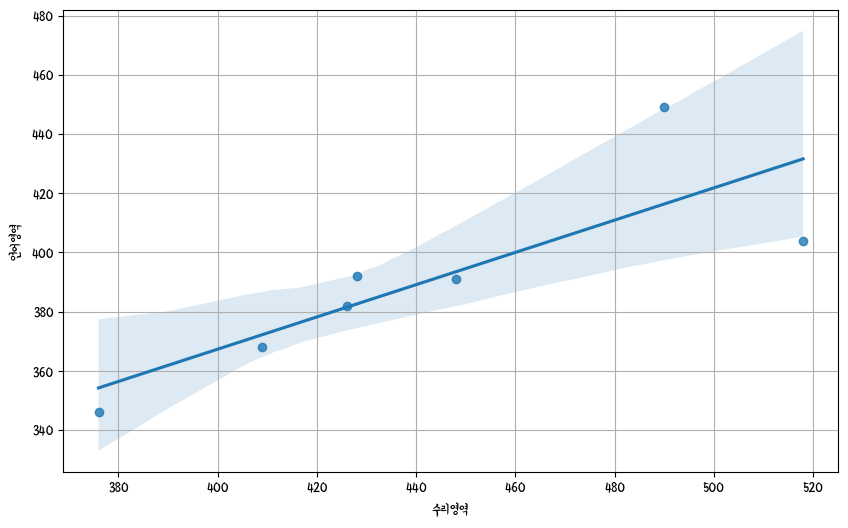

In [13]:
plt.figure()
sb.regplot(x=data["수리영역"],y=data["언어영역"])
plt.grid()
plt.show()

### 공분산

In [15]:
np.cov(data["수리영역"],data["언어영역"])[0,1]

1271.9523809523807

### 상관계수

In [16]:
np.corrcoef(data["수리영역"],data["언어영역"])

array([[1.        , 0.82106421],
       [0.82106421, 1.        ]])

### 피어슨 상관계수

In [17]:
cp.stats.pearsonr(data["수리영역"],data["언어영역"])

PearsonRResult(statistic=0.8210642074423062, pvalue=0.023563708235834223)

## 데이터 프레임으로 상관계수 확인

<Axes: >

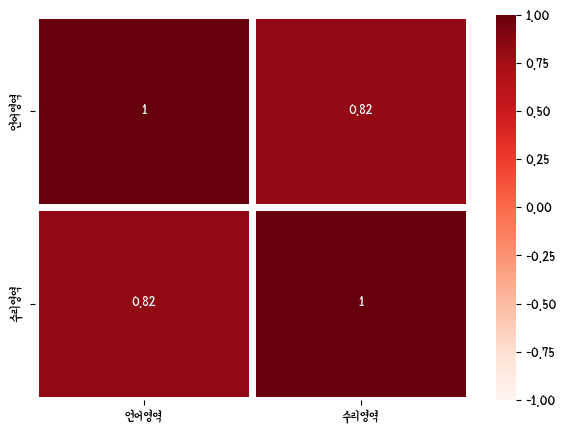

In [28]:
plt.rcParams["figure.figsize"]=(7,5)
plt.figure()
sb.heatmap(data=data.corr(method="pearson"),
           annot=True,
           cmap="Reds",
           vmin=-1,vmax=1,
           linewidths=5)

## 예제

In [30]:
D=pd.read_excel("https://data.hossam.kr/E03/mtcars.xlsx")
data=pd.DataFrame(D)

In [33]:
data.set_index("name",inplace=True,drop=True)

<Axes: >

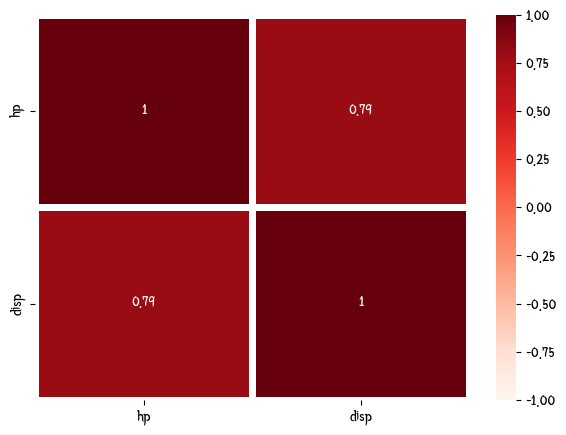

In [41]:
plt.rcParams["figure.figsize"]=(7,5)
plt.figure()
sb.heatmap(data=data.filter(['hp',"disp"]).corr(method="pearson"),
           annot=True,
           cmap="Reds",
           vmin=-1,vmax=1,
           linewidths=5)

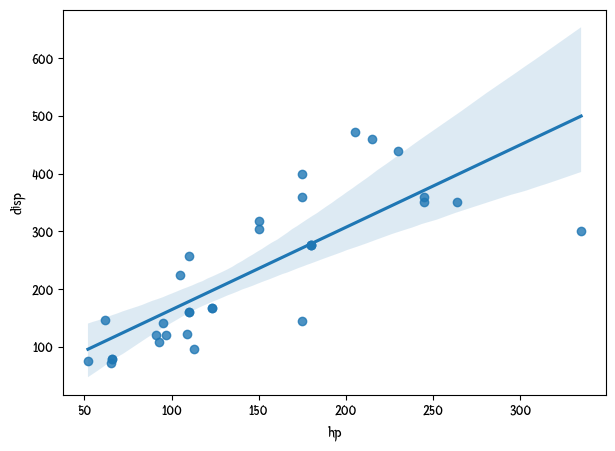

In [46]:
plt.figure()
sb.regplot(data=data.filter(['hp',"disp"]),
           x="hp", y="disp")
plt.show()
plt.close()

In [53]:
col=list(data.columns[:7])
col.remove("hp")

In [57]:
cols=[['hp',x] for x in col]

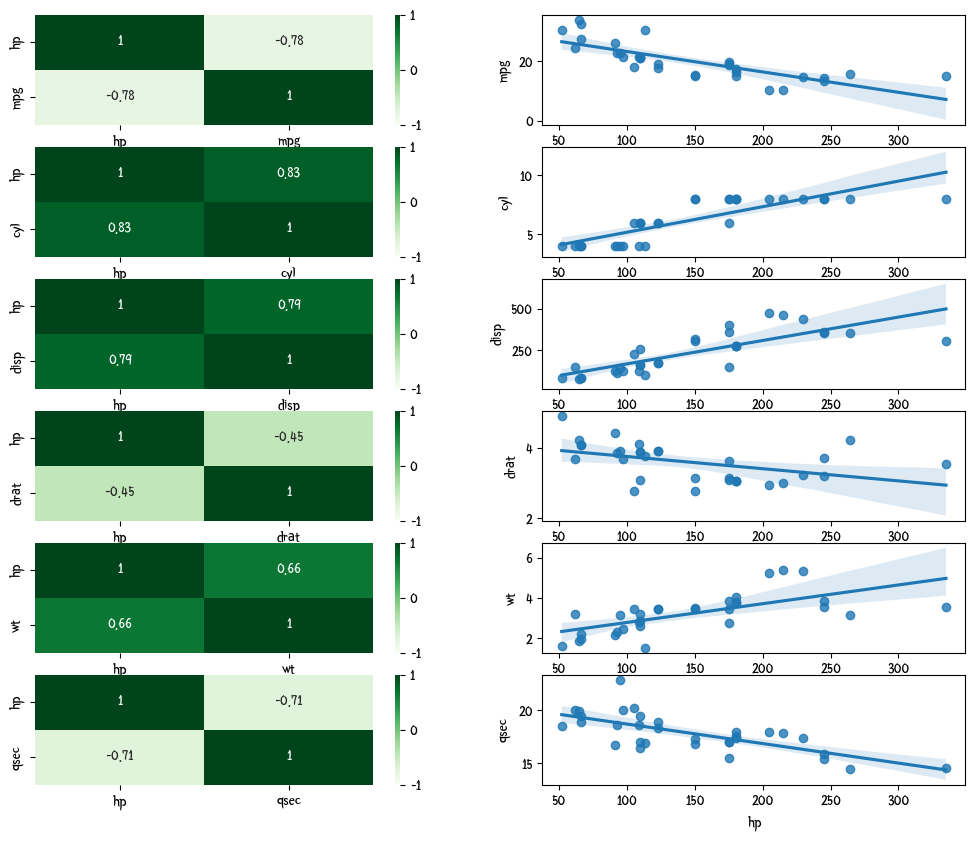

In [65]:
plt.rcParams["figure.figsize"]=(12,10)
f,a=plt.subplots(len(cols),2)
for i in range(len(cols)):
    sb.heatmap(data=data.filter(cols[i]).corr(method="pearson"),
                       cmap="Greens",
                       vmin=-1,
                       vmax=1,
                       annot=True,
                       ax=a[i][0])
    sb.regplot(data=data.filter(cols[i]),
                       x=cols[i][0],
                       y=cols[i][1],
                       ax=a[i][1])
plt.show()
plt.close()